<a href="https://colab.research.google.com/github/97hackbrian/ArtificialVision/blob/master/Exam_2_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Exam 2 - Coding
By:  **Brayan Gerson Duran Toconas**

Create a notebook with functions to perform the following actions:

---


1.    Create a dataframe with the information of each employee per row (first name (fake), last name (fake), age (fake), genre, and paths to the respective fingerprints). You can create fake data for the data marked with (fake).
2.    Create a dataframe to save the entries and exits of the employees.
3.    Extract and save features of one of the fingerprints per employee with the method of your preference.
4.    Register the entry or exit of an employee by passing one of the fingerprint samples to the system.

In [100]:
!pip install unzip
!pip install wget
!pip install faker
#!pip install gdown
#from google.colab import drive
#import gdown

In [101]:
drive_link_share = "https://drive.google.com/file/d/1pTXCCI3og4vG265lY57bBcd6XgVwBuUA/view?usp=sharing" ###INGRESE EL ENLACE COMPARTIDO DEL DATASET O DEL ARCHIVO


file_id = drive_link_share.split("/")[-2]# Buca el penultimo "/" y guarda lo que continua=file_id
# Crear el enlace de descarga directa
direct_download_link = f'https://drive.google.com/u/1/uc?id={file_id}&export=download'# Convierte el enlace a una descargable
!wget -O dataset.zip "{direct_download_link}"# Descarga y le da una nombre
# Descomprimir el archivo sin preguntar
!unzip -qo dataset.zip

--2023-11-01 15:38:57--  https://drive.google.com/u/1/uc?id=1pTXCCI3og4vG265lY57bBcd6XgVwBuUA&export=download
Resolving drive.google.com (drive.google.com)... 142.250.107.101, 142.250.107.138, 142.250.107.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1pTXCCI3og4vG265lY57bBcd6XgVwBuUA&export=download [following]
--2023-11-01 15:38:57--  https://drive.google.com/uc?id=1pTXCCI3og4vG265lY57bBcd6XgVwBuUA&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4e3n7mmak5ioo2diltijs591ml97d02s/1698853125000/01626262771981202003/*/1pTXCCI3og4vG265lY57bBcd6XgVwBuUA?e=download&uuid=3ada2fb5-759d-41a0-8acf-beac3606c7c8 [following]
--2023-11-01 15:38:59--  https://doc-0c-8o-docs.googleuserconten

## DataScience
### 1.

In [102]:
import pandas as pd
from faker import Faker
import random
import re
import os


# Ruta base para las huellas dactilares
base_path = '/content/dataset/'

# Crear una lista para almacenar los datos de empleados
employee_data = []

files=os.listdir(base_path)
files = sorted(files)
print(len(files))


#fingers = ["Index", "Little", "Middle", "Ring", "Thumb"]
fingers_per=10###CANTIDAD DE HUELLAS POR PERSONA
#hands = ["Left", "Right"]
fake = Faker()# Instacia faker para crear nombres falsos
fingerprint_paths=[]# Almacenará una lista de para cada empleado
gender=None# Almacenará el sexo
employee_id=None# Establecerá un id a cada empleado segun su nombre de archivo
count=0#Contará cada 10 muestras para identificar a cada empleado segun la var"fingers_per"
# Generar datos de empleados a partir de las rutas de archivo
for employees in files:# Itera entre todos los archivos
  count+=1# Se suma en 1 cada vez que se recorre cada archivo
  fingerprint_path = os.path.join(base_path, employees)# Se lee la dirección actual de cada empleado
  fingerprint_paths.append(fingerprint_path)# Se almacena las dirección de las muestras dactilares de cada empleado
  if(count==fingers_per):# Cada 10 huellas se cuenta un empleado
    count=0# El contador se reinicia para posteriormente volver a contar las 10 huellas/archivos
    gender = "Male" if "__M_" in fingerprint_path else "Female"# Se pregunta si el caracter de sexo corresponde a Male o Female y lo almacena en Gender
    #print(gender)
    match = re.search(r'(\d+)', fingerprint_path)# Busca algun digito en la cadena, para posteriomente identificar el id
    if match:# Si encuentra algun digito en el nombre del archivo
      employee_id = int(match.group())# Se establece "employee_id" como id del trabajador
    #Se crea las información de cada empleado con los paths de sus respectivos archivos
    employee_info = {
        'id':employee_id,#id del empleado
        'First_Name': fake.first_name_female() if "Female" in gender else fake.first_name_male(),#Primer nombre para hombre o mujer respectivamente
        'Last_Name': fake.last_name(),# Segundo nombre al azar
        'Age': random.randint(24, 60),# Edad randomica
        'Gender': gender,# Genero
        #'Hand': hand,
        #'Finger': finger,
        'Fingerprint_Paths': fingerprint_paths # Append de los paths
    }
    fingerprint_paths=[]# Se vacia la lista para almacenar los nuevos paths de archivos

    employee_data.append(employee_info)# Se adjunta la info de cada empleado


# Crear un DataFrame a partir de la lista de datos de empleados
df = pd.DataFrame(employee_data)
df = df.sort_values(by='id', ascending=True)# Ordena de manera acendente respecto a la columna id
df = df.set_index('id')# Defina la columna id como el index del dataframe

pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas
pd.set_option('display.expand_frame_repr', False)  # Evita que las columnas se ajusten a la pantalla

# Mostrar el DataFrame
df.head(20)
#print(df)


200


,First_Name,Last_Name,Age,Gender,Fingerprint_Paths
id,,,,,
1,Steven,Salazar,47,Male,"[/content/dataset/1__M_Left_index_finger.BMP, ..."
2,Sandra,Abbott,53,Female,"[/content/dataset/2__F_Left_index_finger.BMP, ..."
3,Joseph,Mcgee,41,Male,"[/content/dataset/3__M_Left_index_finger.BMP, ..."
4,Christopher,Mitchell,39,Male,"[/content/dataset/4__M_Left_index_finger.BMP, ..."
5,Walter,Harris,34,Male,"[/content/dataset/5__M_Left_index_finger.BMP, ..."
6,Larry,Schmidt,39,Male,"[/content/dataset/6__M_Left_index_finger.BMP, ..."
7,Derek,Fitzpatrick,49,Male,"[/content/dataset/7__M_Left_index_finger.BMP, ..."
8,Cory,Odom,31,Male,"[/content/dataset/8__M_Left_index_finger.BMP, ..."
9,Scott,Carroll,34,Male,"[/content/dataset/9__M_Left_index_finger.BMP, ..."


### 2.


In [103]:
def count_entry_exit(dataframe, id_employee, entry, exit):
    if id_employee in dataframe.index:# Equivalente de switch en c++
        dataframe.loc[id_employee, 'Entrys'] += entry# localiza el id del empleado y su Entrys y procede a incrementar segun "entry"
        dataframe.loc[id_employee, 'Exits'] += exit# localiza el id del empleado y su Exits y procede a incrementar segun "exit"
    return dataframe# Retorna el dataframe



In [104]:
#Crear un segundo data frame para almacenar las entradas y salidas
df2=pd.DataFrame(df.Last_Name).set_index(df.index)
df2["Entrys"]=0# Crea la columna de entradas y las establece como 0
df2["Exits"]=0# Crea la columna de salidas y las establece como 0

#df2.set_index(df2.id,inplace=True)
#
#print(df2)
#df2=count_entry_exit(df2,6,5,1)#Probando darle 5 entradas y una salida al empleado numero/id 6
#df2=count_entry_exit(df2,6,1,1)#Probando darle una entrada mas y una salida mas al empleado numero/id 6
df2.head(20)# Muestra la salida de los 20 empleados
#print(df2)

,Last_Name,Entrys,Exits
id,,,
1,Salazar,0,0
2,Abbott,0,0
3,Mcgee,0,0
4,Mitchell,0,0
5,Harris,0,0
6,Schmidt,0,0
7,Fitzpatrick,0,0
8,Odom,0,0
9,Carroll,0,0


##Artificial Vision
### 3.

####Tratamiento

In [105]:
import random
def randomFinger(df, fingers_per):
    # Obtener una fila aleatoria del DataFrame
    fila_aleatoria = df.loc[random.randint(1, df.shape[0]), "Fingerprint_Paths"]

    # Obtener una huella aleatoria de la fila
    huella_aleatoria = fila_aleatoria[abs(random.randint(0, fingers_per - 1))]

    return huella_aleatoria

#pathRandom=(df.loc[random.randint(1,df.shape[0]),"Fingerprint_Paths"])[abs(random.randint(0,fingers_per-1))] ## Devuelve la dirección de una huella al azar en funcion al data frame
pathRandom=randomFinger(df,fingers_per)
print(pathRandom)

/content/dataset/9__M_Right_index_finger.BMP


In [106]:
import matplotlib.pyplot as plt
import math
import numpy as np

def show(titles, images, color):
    num_images = len(images)
    num_rows = int(math.ceil(num_images / 3))  # 3 imágenes por fila, puedes ajustar este valor
    num_columns = min(3, num_images)

    #plt.rcParams["figure.figsize"] = (10, 8)
    for i in range(num_images):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(images[i], color, vmin=0, vmax=255)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()



(103, 96, 3)


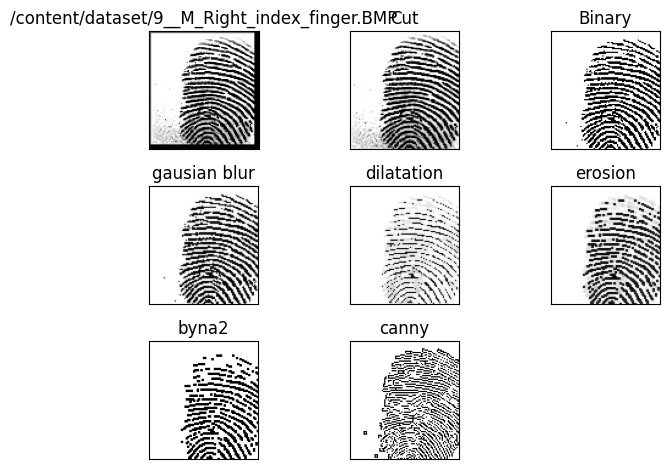

In [107]:
import matplotlib.pyplot as plt
import cv2
imagen = cv2.imread(pathRandom)
print(imagen.shape)
imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
imagenCut=imagen[2:99,2:92]
_,binary=cv2.threshold(imagenCut,90,255,cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(binary, (3, 3),0.45)#0.4666
canny=255-cv2.Canny(blur,1,10)
kernel = np.ones((2, 2), np.uint8)
dilatation=cv2.dilate(blur,kernel, iterations=1)
erotion=cv2.erode(dilatation, kernel, iterations=1)
_,binary2=cv2.threshold(erotion,150,255,cv2.THRESH_BINARY)

show([pathRandom,"Cut","Binary","gausian blur","dilatation","erosion","byna2","canny"],[imagen,imagenCut,binary,blur,dilatation,erotion,binary2,canny],"gray")

##### Ejemplo de detección de caracteristicas

matched => 168.93490600585938
No.


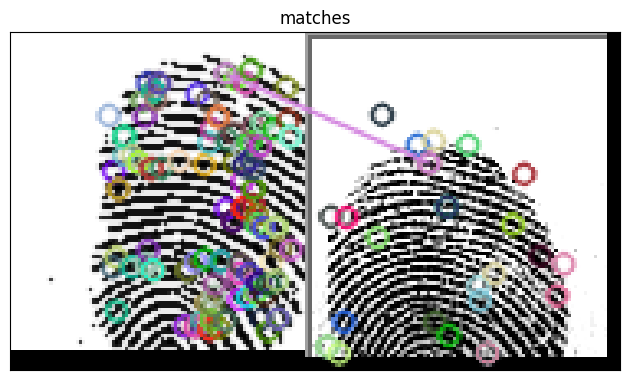

In [108]:
##GAUSIAN BLUR == BEST
sift = cv2.xfeatures2d.SIFT_create()
img1=blur.copy()
#img2=imagen.copy()
img2=cv2.imread(randomFinger(df,fingers_per),0)
# Encontrar los puntos clave y descriptores en ambas imágenes
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Emparejar características entre las dos imágenes
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Aplicar el filtro de razón de Lowe para seleccionar los mejores emparejamientos
good_matches = []
for m, n in matches:
  if m.distance < 0.80 * n.distance:
    good_matches.append(m)
    print("matched =>",m.distance)


umbral = 0.10
if len(good_matches) / len(keypoints1) > umbral:
  print("Coincide.")
else:
  print("No.")

# Dibujar los mejores emparejamientos en una imagen
resultado = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None)

show(["matches"],[resultado],"gray")


### 4.

In [109]:

def mostrar_caracteristicas_sift(imagen_path,retorno):
    # Crear un detector SIFT
    sift = cv2.SIFT_create()

    # Cargar la imagen
    if type(imagen_path)==str():
      imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    else:
      imagen=imagen_path

    # Detectar características SIFT
    keypoints, descriptors = sift.detectAndCompute(imagen, None)

    # Dibujar las características en la imagen
    imagen_con_caracteristicas = cv2.drawKeypoints(imagen, keypoints, outImage=None)


    if retorno ==1:
      return descriptors
    else:
      # Mostrar la imagen con características SIFT
      plt.imshow(imagen_con_caracteristicas)
      plt.title("Características SIFT")
      plt.axis('off')
      plt.show()

    #coordinates = [(keypoint.pt[0], keypoint.pt[1]) for keypoint in keypoints]

    #return coordinates

# Llamada de ejemplo a la función
#caracteristicas=mostrar_caracteristicas_sift(blur)

#df2 = df.copy()
#print(df2)
df2["Characteristics"] = None  # Inicializa la columna "Characteristics" con valores nulos

# Itera a través de los empleados y sus rutas de huellas dactilares
for index, row in df.iterrows():
    fingerprint_paths = row['Fingerprint_Paths']
    characteristics_list = []  # Lista para almacenar las características SIFT de las huellas

    for fingerprint_path in fingerprint_paths:
        # Lee la imagen de la huella dactilar
        image = cv2.imread(fingerprint_path)
        imagenCut=image[2:99,2:92]
        _,binary=cv2.threshold(imagenCut,90,255,cv2.THRESH_BINARY)
        blur = cv2.GaussianBlur(binary, (3, 3),0.45)#0.4666

        # Calcula las características SIFT
        characteristics = mostrar_caracteristicas_sift(blur,1)

        if characteristics is not None:
            characteristics_list.append(characteristics)

    # Asigna la lista de características al empleado en df2
    df2.at[index, "Characteristics"] = characteristics_list

# Ahora df2 contiene las características SIFT para cada empleado en la columna "Characteristics"
df2.head(20)


,Last_Name,Entrys,Exits,Characteristics
id,,,,
1,Salazar,0,0,"[[[20.0, 19.0, 16.0, 10.0, 5.0, 2.0, 8.0, 16.0..."
2,Abbott,0,0,"[[[5.0, 3.0, 1.0, 1.0, 8.0, 12.0, 8.0, 4.0, 15..."
3,Mcgee,0,0,"[[[7.0, 8.0, 5.0, 18.0, 14.0, 3.0, 10.0, 10.0,..."
4,Mitchell,0,0,"[[[105.0, 23.0, 6.0, 33.0, 34.0, 2.0, 0.0, 3.0..."
5,Harris,0,0,"[[[48.0, 33.0, 2.0, 11.0, 32.0, 9.0, 1.0, 3.0,..."
6,Schmidt,0,0,"[[[16.0, 22.0, 9.0, 1.0, 2.0, 8.0, 9.0, 14.0, ..."
7,Fitzpatrick,0,0,"[[[20.0, 71.0, 88.0, 33.0, 0.0, 0.0, 0.0, 0.0,..."
8,Odom,0,0,"[[[57.0, 153.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0,..."
9,Carroll,0,0,"[[[17.0, 93.0, 16.0, 1.0, 4.0, 113.0, 37.0, 8...."


In [110]:
import os

yes=1
ident=0
while yes:
  huella=input("ingrese huella del empledo (dirección)")
  # Calcular las características SIFT de la imagen que deseas comparar
  imagen_a_comparar = cv2.imread(huella)  # Reemplaza 'ruta_de_la_imagen.jpg' con la ruta de tu imagen
  imagen_a_comparar_cut = imagen_a_comparar[2:99, 2:92]
  _, binary_imagen_a_comparar = cv2.threshold(imagen_a_comparar_cut, 90, 255, cv2.THRESH_BINARY)
  blur_imagen_a_comparar = cv2.GaussianBlur(binary_imagen_a_comparar, (3, 3), 0.45)
  caracteristicas_imagen_a_comparar = mostrar_caracteristicas_sift(blur_imagen_a_comparar,1)

  # Crear un detector SIFT
  sift = cv2.SIFT_create()

  # Calcular los descriptores SIFT de las características de la imagen a comparar
  #_, descriptores_imagen_a_comparar = sift.compute(blur_imagen_a_comparar, caracteristicas_imagen_a_comparar)

  # Iterar a través de los empleados en df2 para realizar la comparación
  for index, row in df2.iterrows():
      caracteristicas_empleado = row['Characteristics']

      if caracteristicas_empleado is not None:
          # Recorrer la lista de coordenadas de keypoints del empleado
          for coordenadas in caracteristicas_empleado:
              # Calcular los descriptores SIFT de las coordenadas del empleado
              #_, descriptores_empleado = sift.compute(blur_imagen_a_comparar, coordenadas)
              keypoints1, descriptors1 = sift.detectAndCompute(blur_imagen_a_comparar, None)

              # Realizar la comparación de descriptores
              bf = cv2.BFMatcher()
              matches = bf.knnMatch(coordenadas, descriptors1, k=2)

              # Aplicar el criterio de relación para seleccionar las mejores coincidencias
              good_matches = []

              for m, n in matches:
                if m.distance < 0.59 * n.distance:
                  good_matches.append(m)
                  #print("matched =>",m.distance)


              umbral = 0.12
              if len(good_matches) / len(keypoints1) > umbral:
                #print("Coincide.")
                #print(f"Coincidencia encontrada para el empleado {index}")
                ident=index



  # Ajusta un_valor_de_umbral según tus necesidades para determinar cuántas coincidencias son suficientes para considerar una coincidencia válida.

  print("La huella corresponde al empleado con el id: ",ident)
  enex=int(input("Registre entrada=1/salida=0:  "))
  if enex == 1:
        df2 = count_entry_exit(df2, ident, 1, 0)
  elif enex == 0:
      df2 = count_entry_exit(df2, ident, 0, 1)
  print(df2)

  yes=int(input("Desea continuar Si=1 , No=0 => "))
  os.system('clear')

ingrese huella del empledo (dirección)/content/dataset/2__F_Left_middle_finger.BMP
La huella corresponde al empleado con el id:  2
Registre entrada=1/salida=0:  1
      Last_Name  Entrys  Exits                                    Characteristics
id                                                                               
1       Salazar       0      0  [[[20.0, 19.0, 16.0, 10.0, 5.0, 2.0, 8.0, 16.0...
2        Abbott       1      0  [[[5.0, 3.0, 1.0, 1.0, 8.0, 12.0, 8.0, 4.0, 15...
3         Mcgee       0      0  [[[7.0, 8.0, 5.0, 18.0, 14.0, 3.0, 10.0, 10.0,...
4      Mitchell       0      0  [[[105.0, 23.0, 6.0, 33.0, 34.0, 2.0, 0.0, 3.0...
5        Harris       0      0  [[[48.0, 33.0, 2.0, 11.0, 32.0, 9.0, 1.0, 3.0,...
6       Schmidt       0      0  [[[16.0, 22.0, 9.0, 1.0, 2.0, 8.0, 9.0, 14.0, ...
7   Fitzpatrick       0      0  [[[20.0, 71.0, 88.0, 33.0, 0.0, 0.0, 0.0, 0.0,...
8          Odom       0      0  [[[57.0, 153.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0,...
9       Carroll  

Como se puede observar en la celda anterior, cuando el pasamos la huella al programa este se encarga de buscar coincidencia segun se base de datos dataframe "df2" en la columna "Characteristics" y cuando encuentra la coincidencia retorna el index "id" del trabajador que coincide con la huella de entrada y la huella guardada. Posteriormente, el programa pregunta si deseamos registrar una entrada o salida en el trabajador detectado. Por ultimo pregunta si queremos seguir haciendo mas consultas.